In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('laptop_data.csv')

In [3]:
data.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
data.sample(10)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
281,281,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,22803.8400
690,690,Acer,Notebook,14.0,1366x768,Intel Celeron Dual Core 3855U 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 510,Chrome OS,1.45kg,19980.0000
836,836,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg,128884.3200
830,830,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32GB,512GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49kg,292986.7200
1127,1127,HP,Ultrabook,12.5,1366x768,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 7,1.26kg,100965.6000
428,428,HP,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,12GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,3.35kg,106506.7200
714,714,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,16GB,512GB SSD,Intel HD Graphics 620,Windows 10,1.93kg,76012.4448
379,379,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.4kg,45074.8800
851,851,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.1kg,101178.7200
297,297,Dell,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16GB,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42kg,153705.3408


In [5]:
data.shape

(1303, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [7]:
data.duplicated().sum()

0

In [8]:
data.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [9]:
data.drop(columns=['Unnamed: 0'] , inplace=True)

In [10]:
data['Ram'] = data['Ram'].str.replace('GB' , ' ')

In [11]:
data['Weight'] = data['Weight'].str.replace('kg' , ' ')

In [12]:
data['Ram'] = data['Ram'].astype('int32')
data['Weight'] = data['Weight'].astype('float32')

In [13]:
data.head(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


<Axes: ylabel='Density'>

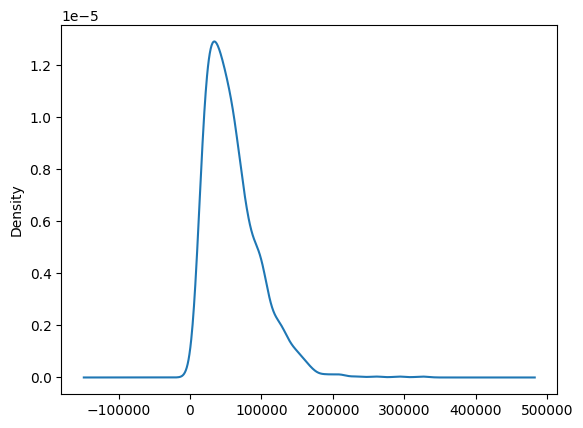

In [14]:
data['Price'].plot(kind='kde')

In [15]:
data['Price'].skew()

1.5208655681688517

<Axes: xlabel='Company'>

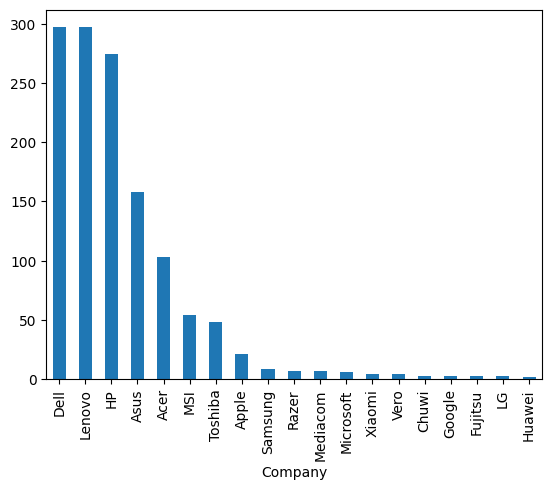

In [16]:
data['Company'].value_counts().plot(kind='bar')

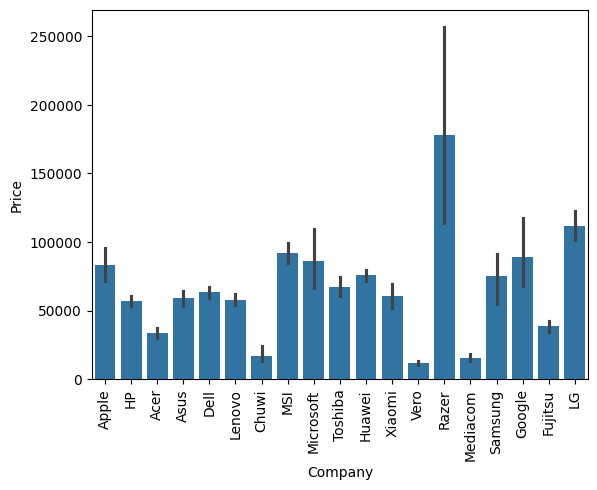

In [17]:
sns.barplot(x=data['Company'] , y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='TypeName'>

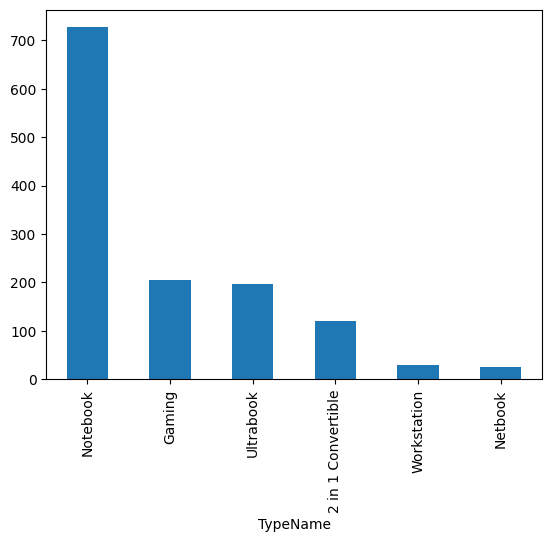

In [18]:
data['TypeName'].value_counts().plot(kind='bar')

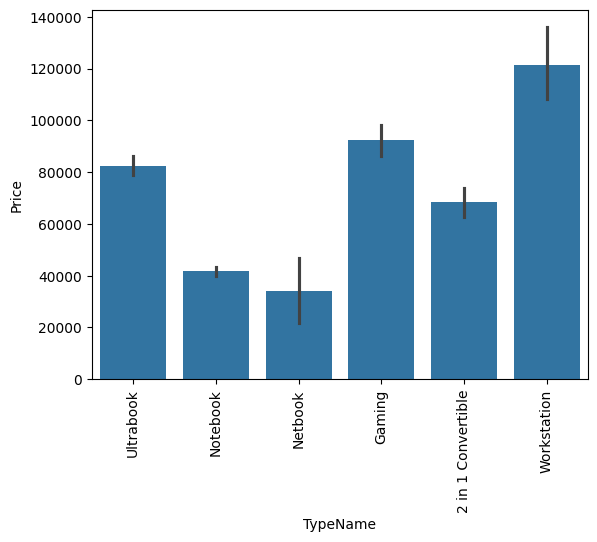

In [19]:
sns.barplot(x=data['TypeName'] , y=data['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Inches', ylabel='Price'>

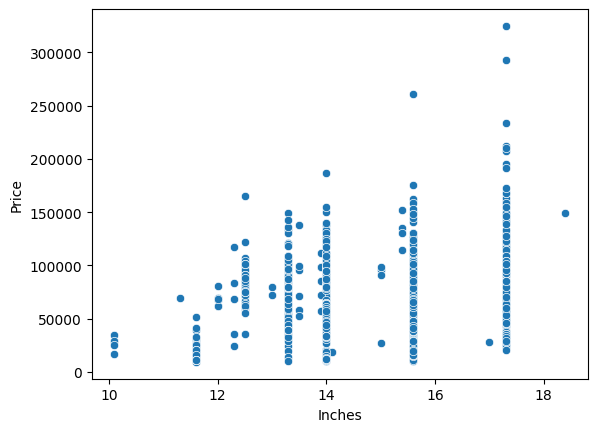

In [20]:
sns.scatterplot(x=data['Inches'], y= data['Price'])

In [21]:
data['Price'].corr(data['Inches'])

0.06819666592963956

<Axes: xlabel='ScreenResolution'>

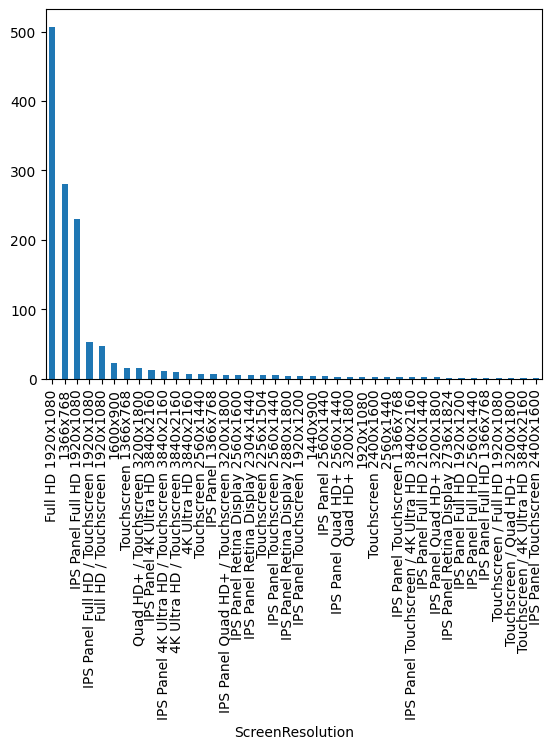

In [22]:
data['ScreenResolution'].value_counts().plot(kind='bar')

In [23]:
data['TouchSreen'] = data['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)

In [24]:
data.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchSreen
727,Dell,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i3 7100U 2.4GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.71,34578.7200,1
833,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.70,63190.0800,0
651,Acer,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.40,37775.5200,0
90,Asus,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.45,37242.7200,0
1121,HP,Notebook,13.3,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.16,90043.2000,0
986,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,2.04,42943.6800,0
179,HP,2 in 1 Convertible,13.3,IPS Panel 4K Ultra HD / Touchscreen 3840x2160,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.29,79866.7200,1
1178,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 970M,Windows 10,1.91,114731.5536,0
547,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,1TB HDD,Intel HD Graphics 520,No OS,2.15,24634.0080,0
864,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i7 7660U 2.5GHz,16,512GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.29,119347.2000,1


In [25]:
data['TouchSreen'].value_counts()

TouchSreen
0    1111
1     192
Name: count, dtype: int64

In [26]:
data['Price'].corr(data['TouchSreen'])

0.19122646378672206

<Axes: xlabel='TouchSreen', ylabel='Price'>

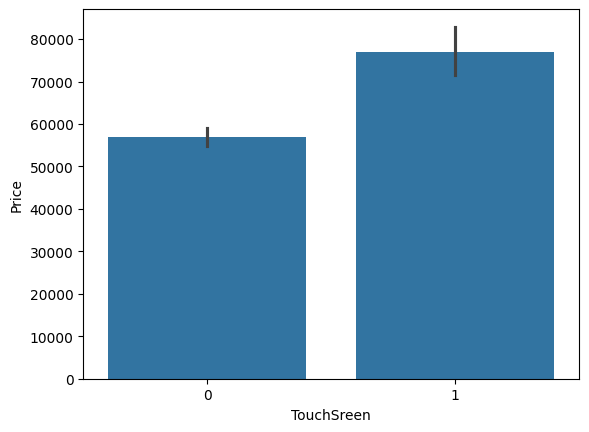

In [27]:
sns.barplot(x=data['TouchSreen'] , y= data['Price'])

In [28]:
data['IPS'] = data['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)

In [29]:
new = data['ScreenResolution'].str.split('x' , n=1 , expand=True)

In [30]:
data['y_resolution'] = new[1]

In [31]:
data.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchSreen,IPS,y_resolution
27,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 530,Windows 10,2.20,42624.00,0,0,1080
1010,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,1.0TB Hybrid,Nvidia GeForce GTX 1050,Windows 10,2.65,50562.72,0,0,1080
451,Dell,Workstation,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 6820HQ 2.7GHz,16,256GB SSD,Nvidia Quadro M620,Windows 10,2.17,105228.00,0,1,1080
1228,Lenovo,Gaming,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 960M,Windows 10,2.60,54825.12,1,1,1080
649,Lenovo,Ultrabook,12.5,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.36,84395.52,0,1,1080


In [32]:
data['x_resolution'] = new[0]
data['x_resolution'] = data['x_resolution'].str.replace(',' , '').str.findall(r'(\d+\.?\d+)').apply(lambda x: x[0])

In [33]:
data['x_resolution']=data['x_resolution'].astype('int32')
data['y_resolution']=data['y_resolution'].astype('int32')

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchSreen        1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  y_resolution      1303 non-null   int32  
 14  x_resolution      1303 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 132.5+ KB


In [35]:
numerical_data = data.select_dtypes(include=['number'])

numerical_data.corr()

,Inches,Ram,Weight,Price,TouchSreen,IPS,y_resolution,x_resolution
Inches,1.000000,0.237993,0.827631,0.068197,-0.361735,-0.114804,-0.095404,-0.071245
Ram,0.237993,1.000000,0.383874,0.743007,0.116984,0.206623,0.424437,0.433121
Weight,0.827631,0.383874,1.000000,0.210370,-0.294620,0.016967,-0.053846,-0.032880
Price,0.068197,0.743007,0.210370,1.000000,0.191226,0.252208,0.552809,0.556529
TouchSreen,-0.361735,0.116984,-0.294620,0.191226,1.000000,0.150512,0.357930,0.351066
IPS,-0.114804,0.206623,0.016967,0.252208,0.150512,1.000000,0.289030,0.281457
y_resolution,-0.095404,0.424437,-0.053846,0.552809,0.357930,0.289030,1.000000,0.994219
x_resolution,-0.071245,0.433121,-0.032880,0.556529,0.351066,0.281457,0.994219,1.000000


In [36]:
data['ppi'] = (((data['x_resolution']**2) + (data['y_resolution']**2))**0.5/ data['Inches']).astype('float')

In [37]:
data.drop(columns=['ScreenResolution'], inplace=True)

In [38]:
data.sample(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchSreen,IPS,y_resolution,x_resolution,ppi
337,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,60952.3200,0,0,1080,1920,141.211998
1242,Acer,Notebook,15.6,Intel Core i3 6006U 2.0GHz,4,500GB HDD,Intel HD Graphics 520,Linux,2.40,19276.7040,0,0,768,1366,100.454670
1048,Lenovo,Gaming,17.3,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.60,122010.6672,0,1,1080,1920,127.335675
87,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.96,31914.1872,0,0,1080,1920,141.211998
397,Lenovo,Notebook,14.0,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,49976.6400,0,1,1080,1920,157.350512


In [39]:
data['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: count, Length: 118, dtype: int64

In [40]:
data['Cpu_Name'] = data['Cpu'].apply(lambda x : " ".join(x.split()[0:3]))

In [41]:
data.sample(15)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchSreen,IPS,y_resolution,x_resolution,ppi,Cpu_Name
875,Dell,Ultrabook,12.5,Intel Core i7 7600U 2.8GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,90043.2000,0,0,1080,1920,176.232574,Intel Core i7
191,Vero,Notebook,14.0,Intel Celeron Dual Core N3350 1.1GHz,4,32GB Flash Storage,Intel HD Graphics 500,Windows 10,1.30,13852.8000,0,1,1080,1920,157.350512,Intel Celeron Dual
610,Lenovo,Notebook,15.6,Intel Xeon E3-1535M v6 3.1GHz,32,1TB SSD,Nvidia Quadro M2200M,Windows 10,2.50,261018.7200,0,1,2160,3840,282.423996,Intel Xeon E3-1535M
723,Dell,Gaming,17.3,Intel Core i7 7700HQ 2.8GHz,32,1TB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.36,194972.8320,0,0,2160,3840,254.671349,Intel Core i7
981,Toshiba,Notebook,13.3,Intel Core i5 6200U 2.3GHz,4,128GB SSD,Intel HD Graphics 520,Windows 7,1.20,63669.6000,0,0,1080,1920,165.632118,Intel Core i5
681,Asus,Notebook,15.6,Intel Celeron Dual Core N3350 1.1GHz,4,128GB SSD,Intel HD Graphics 500,Windows 10,1.86,22324.3200,0,0,768,1366,100.454670,Intel Celeron Dual
1098,HP,Notebook,15.6,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,1.96,26640.0000,0,0,768,1366,100.454670,Intel Pentium Quad
1049,Asus,Netbook,11.6,Intel Celeron Dual Core N3060 1.6GHz,4,16GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.20,15339.3120,0,0,768,1366,135.094211,Intel Celeron Dual
426,Dell,Notebook,15.6,Intel Core i7 8550U 1.8GHz,8,256GB SSD + 2TB HDD,AMD Radeon 530,Windows 10,2.02,60867.0720,0,0,1080,1920,141.211998,Intel Core i7
1043,Lenovo,Notebook,15.6,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.30,55922.6880,0,0,1080,1920,141.211998,Intel Core i5


In [42]:
def fetch_processor(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD processor'

In [43]:
data['Cpu brand'] = data['Cpu_Name'].apply(fetch_processor)

In [44]:
data.head(5)

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchSreen,IPS,y_resolution,x_resolution,ppi,Cpu_Name,Cpu brand
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

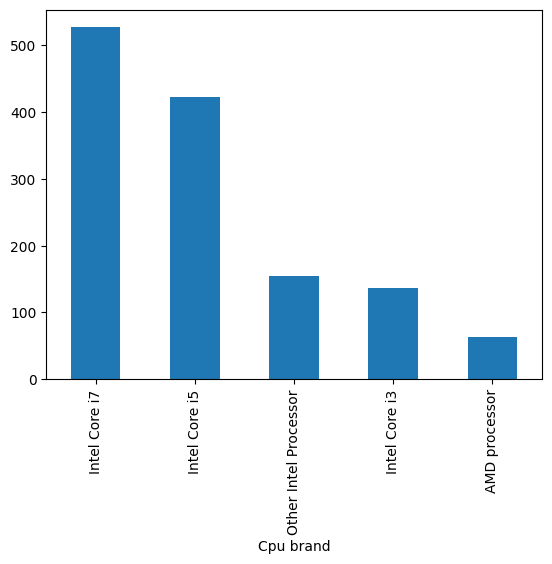

In [45]:
data['Cpu brand'].value_counts().plot(kind='bar')

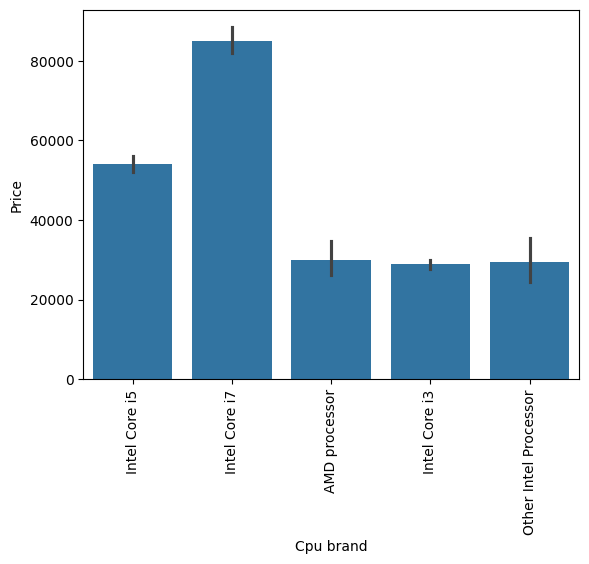

In [46]:
sns.barplot(x=data['Cpu brand'] , y= data['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [47]:
data.drop(columns=['Cpu' , 'Cpu_Name'], inplace=True)

In [48]:
data.head(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchSreen,IPS,y_resolution,x_resolution,ppi,Cpu brand
0,Apple,Ultrabook,13.3,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560,226.983005,Intel Core i5
1,Apple,Ultrabook,13.3,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440,127.677940,Intel Core i5
2,HP,Notebook,15.6,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920,141.211998,Intel Core i5
3,Apple,Ultrabook,15.4,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880,220.534624,Intel Core i7
4,Apple,Ultrabook,13.3,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560,226.983005,Intel Core i5


In [92]:
numerical_data = data.select_dtypes(include=['number'])
numerical_data.corr()['Price']

Inches        0.067329
Ram           0.742905
Weight        0.209867
Price         1.000000
TouchSreen    0.192917
IPS           0.253320
ppi           0.475368
HDD          -0.117599
SSD           0.545908
Name: Price, dtype: float64

<Axes: xlabel='Ram'>

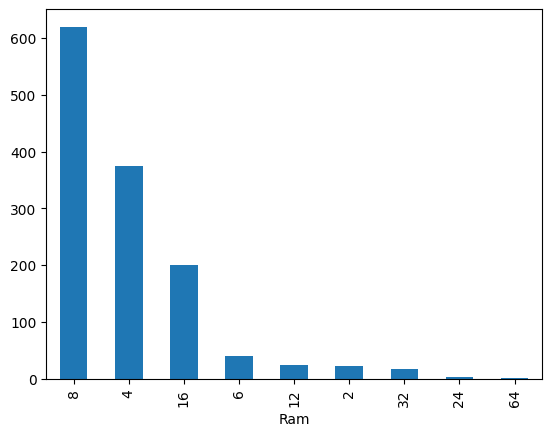

In [50]:
data['Ram'].value_counts().plot(kind='bar')

<Axes: xlabel='Ram', ylabel='Price'>

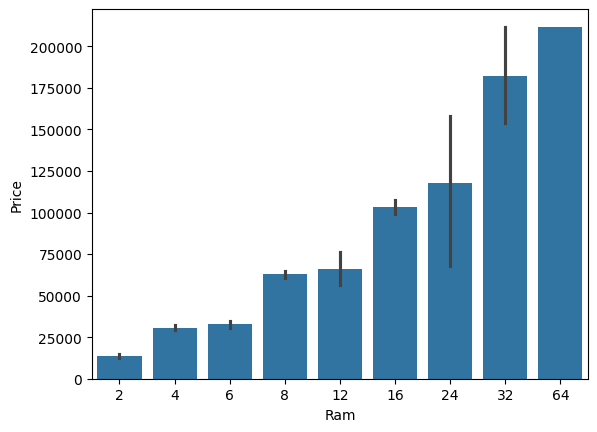

In [51]:
sns.barplot(x=data['Ram'] , y= data['Price'])

In [52]:
data['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [55]:
# Convert 'Memory' column to string and clean it
data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
data['Memory'] = data['Memory'].str.replace('GB', '')
data['Memory'] = data['Memory'].str.replace('TB', '000')

# Split on '+' to separate multiple storage types
new = data['Memory'].str.split("+", n=1, expand=True)

# Get the first and second storage parts
data['first'] = new[0].str.strip()
data['second'] = new[1].fillna("0").str.strip()

# Identify storage types in 'first'
data["Layer1HDD"] = data["first"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer1SSD"] = data["first"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer1Hybrid"] = data["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer1Flash_Storage"] = data["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Identify storage types in 'second'
data["Layer2HDD"] = data["second"].apply(lambda x: 1 if "HDD" in x else 0)
data["Layer2SSD"] = data["second"].apply(lambda x: 1 if "SSD" in x else 0)
data["Layer2Hybrid"] = data["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
data["Layer2Flash_Storage"] = data["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract numeric values from 'first' and 'second'
data['first'] = data['first'].str.extract('(\d+)')
data['second'] = data['second'].str.extract('(\d+)')

# Convert to integer, fill missing with 0
data["first"] = data["first"].fillna(0).astype(int)
data["second"] = data["second"].fillna(0).astype(int)

# Calculate total capacity per storage type
data["HDD"] = (data["first"] * data["Layer1HDD"] + data["second"] * data["Layer2HDD"])
data["SSD"] = (data["first"] * data["Layer1SSD"] + data["second"] * data["Layer2SSD"])
data["Hybrid"] = (data["first"] * data["Layer1Hybrid"] + data["second"] * data["Layer2Hybrid"])
data["Flash_Storage"] = (data["first"] * data["Layer1Flash_Storage"] + data["second"] * data["Layer2Flash_Storage"])

# Drop intermediate columns
data.drop(columns=[
    'first', 'second', 
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)


<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:26: SyntaxWarning: invalid escape sequence '\d'
<>:27: SyntaxWarning: invalid escape sequence '\d'
C:\Users\abish\AppData\Local\Temp\ipykernel_17912\2410116623.py:2: SyntaxWarning: invalid escape sequence '\.'
  data['Memory'] = data['Memory'].astype(str).replace('\.0', '', regex=True)
C:\Users\abish\AppData\Local\Temp\ipykernel_17912\2410116623.py:26: SyntaxWarning: invalid escape sequence '\d'
  data['first'] = data['first'].str.extract('(\d+)')
C:\Users\abish\AppData\Local\Temp\ipykernel_17912\2410116623.py:27: SyntaxWarning: invalid escape sequence '\d'
  data['second'] = data['second'].str.extract('(\d+)')


In [56]:
data.head(5)

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,TouchSreen,IPS,y_resolution,x_resolution,ppi,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,1600,2560,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,900,1440,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1080,1920,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,1800,2880,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,1600,2560,226.983005,Intel Core i5,0,256,0,0


In [57]:
data.drop(columns=['Memory'] , inplace=True)

In [59]:
data.drop(columns=['x_resolution' , 'y_resolution'] , inplace=True)

In [61]:
data.drop(columns=['Flash_Storage' , 'Hybrid'] , inplace=True)

In [62]:
numerical_data = data.select_dtypes(include=['number'])
numerical_data.corr()['Price']

Inches        0.068197
Ram           0.743007
Weight        0.210370
Price         1.000000
TouchSreen    0.191226
IPS           0.252208
ppi           0.473487
HDD          -0.117423
SSD           0.546119
Name: Price, dtype: float64

In [63]:
data.head(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,TouchSreen,IPS,ppi,Cpu brand,HDD,SSD
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


<Axes: xlabel='Gpu'>

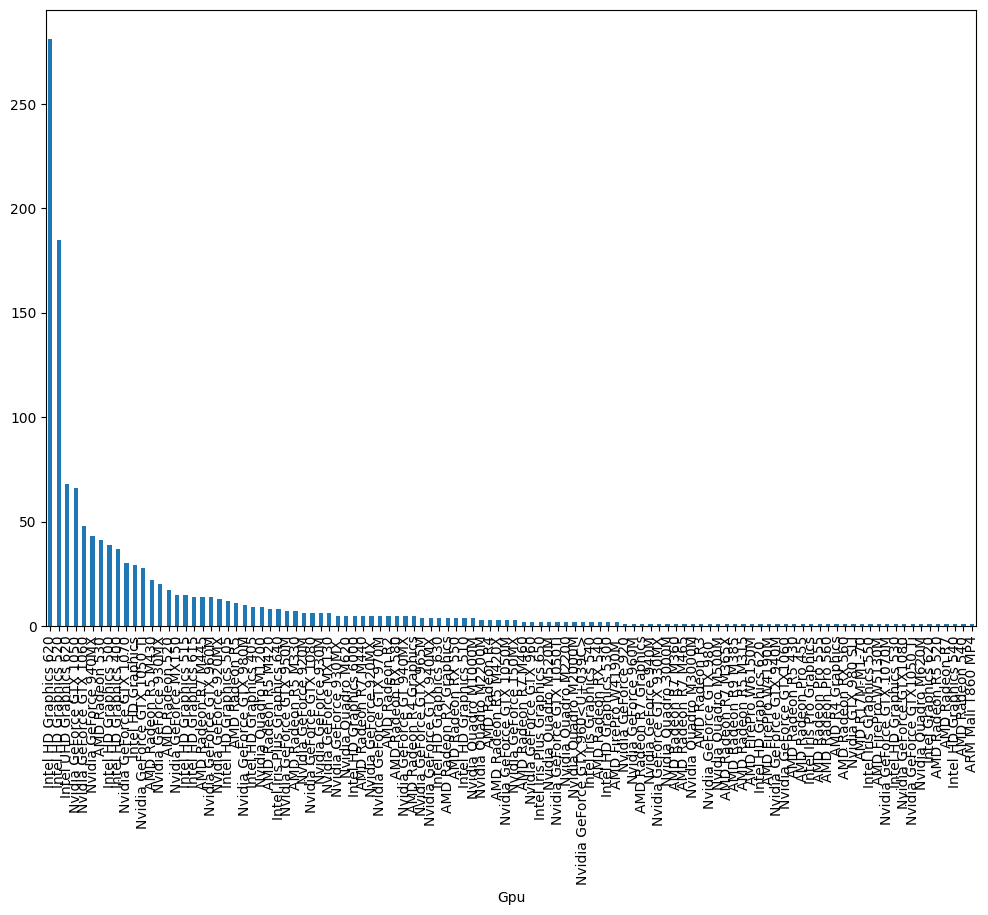

In [67]:
plt.figure(figsize=(12 , 8))
data['Gpu'].value_counts().plot(kind='bar')

In [69]:
data['Gpu_Brand'] = data['Gpu'].apply(lambda x: x.split()[0])

In [70]:
data.head(5)

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,TouchSreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [75]:
data['Gpu_Brand'].value_counts()

Gpu_Brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [74]:
data = data[data['Gpu_Brand']!= 'ARM']

<Axes: xlabel='Gpu_Brand', ylabel='Price'>

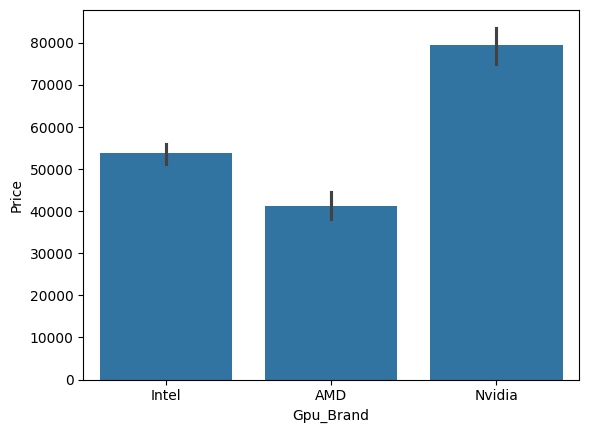

In [76]:
sns.barplot(x=data['Gpu_Brand'] , y=data['Price'])

In [79]:
data.drop(columns=['Gpu'] , inplace=True)

C:\Users\abish\AppData\Local\Temp\ipykernel_17912\1774859221.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['Gpu'] , inplace=True)


In [80]:
data.head(5)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchSreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu_Brand
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [81]:
data['OpSys'].value_counts(
)

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [82]:
def cat_os(text):
    if text == 'Windows 10' or text == 'Windows 7' or text == 'Windows 10 S':
        return 'Windows'
    elif text == 'macOS' or text == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No Os/Linux'

In [84]:
data['Ops'] = data['OpSys'].apply(cat_os)

C:\Users\abish\AppData\Local\Temp\ipykernel_17912\3801768723.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Ops'] = data['OpSys'].apply(cat_os)


In [85]:
data.head(5)

,Company,TypeName,Inches,Ram,OpSys,Weight,Price,TouchSreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu_Brand,Ops
0,Apple,Ultrabook,13.3,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No Os/Linux
3,Apple,Ultrabook,15.4,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [86]:
data.drop(columns=['OpSys'],inplace=True)

C:\Users\abish\AppData\Local\Temp\ipykernel_17912\3201059909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns=['OpSys'],inplace=True)


In [87]:
data.head(5)

,Company,TypeName,Inches,Ram,Weight,Price,TouchSreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu_Brand,Ops
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No Os/Linux
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


<Axes: xlabel='Ops', ylabel='Price'>

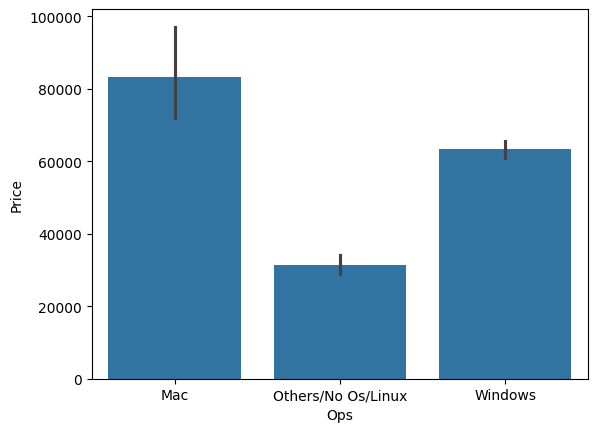

In [88]:
sns.barplot(x=data['Ops']  , y= data['Price'])

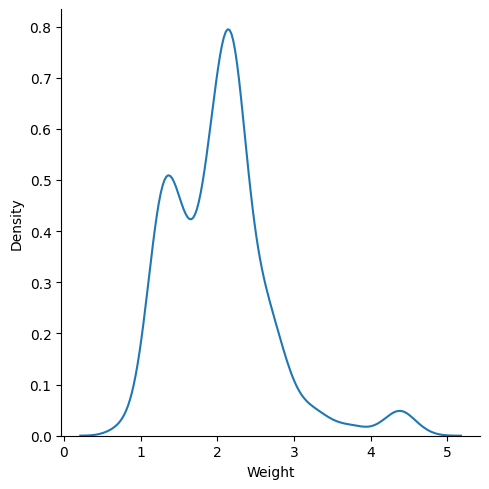

In [90]:
sns.displot(data['Weight'], kind='kde')

<Axes: xlabel='Weight', ylabel='Price'>

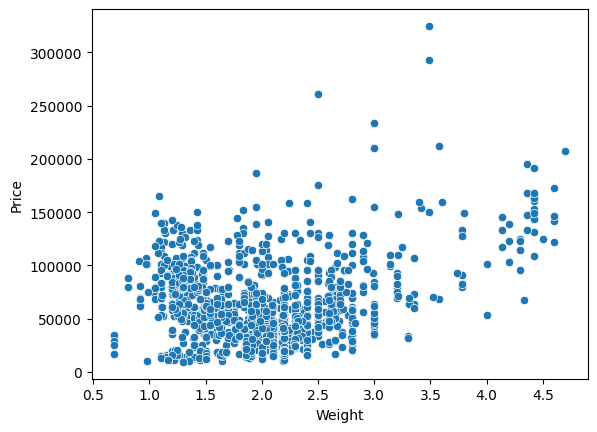

In [91]:
sns.scatterplot(x=data['Weight'] , y= data['Price'])

In [93]:
numerical_data.corr()['Price']

Inches        0.067329
Ram           0.742905
Weight        0.209867
Price         1.000000
TouchSreen    0.192917
IPS           0.253320
ppi           0.475368
HDD          -0.117599
SSD           0.545908
Name: Price, dtype: float64

<Axes: >

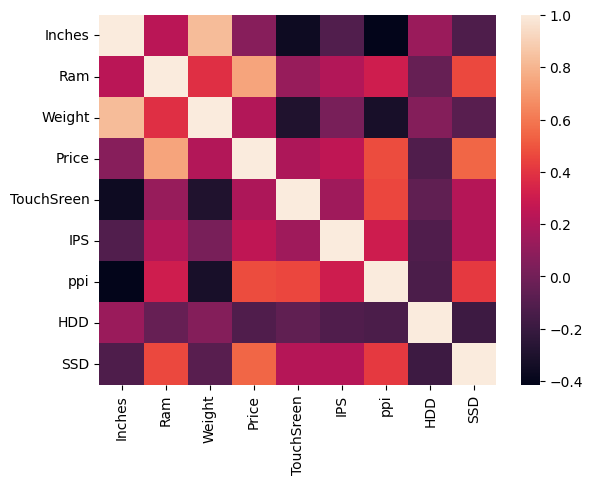

In [95]:
sns.heatmap(numerical_data.corr())

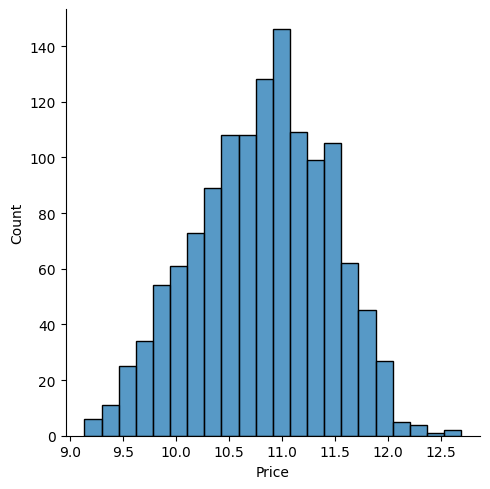

In [97]:
sns.displot(np.log(data['Price']))

In [98]:
x = data.drop(columns=['Price'])
y = np.log(data['Price'])

In [99]:
x

,Company,TypeName,Inches,Ram,Weight,TouchSreen,IPS,ppi,Cpu brand,HDD,SSD,Gpu_Brand,Ops
0,Apple,Ultrabook,13.3,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No Os/Linux
3,Apple,Ultrabook,15.4,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,13.3,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,14.0,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,15.6,6,2.19,0,0,100.454670,Intel Core i7,0,0,AMD,Windows


In [105]:
data.drop(columns=['Inches'] , inplace=True)

In [106]:
x.drop(columns=['Inches'] , inplace=True)

## modeling

In [107]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size=0.15 , random_state=2)

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [102]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor , AdaBoostRegressor , ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [109]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score , mean_absolute_error

In [114]:
step1 = ColumnTransformer(transformers=[
    ('col_tf' , OneHotEncoder(sparse_output= False , drop='first'),[0 , 1 , 7 ,10 , 11])],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1' ,step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:  ' , r2_score(y_test , y_pred))
print('MAE:  ' , mean_absolute_error(y_test , y_pred))

R2 Score:   0.8060646692423117
MAE:   0.21309684131095397


## Using RandomForest

In [116]:
step1 = ColumnTransformer(transformers=[
    ('col_tf' , OneHotEncoder(sparse_output= False , drop='first'),[0 , 1 , 7 ,10 , 11])],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100 , random_state=3 , max_samples=0.5 , max_features=0.75 , max_depth=20)

pipe = Pipeline([
    ('step1' ,step1),
    ('step2' , step2)
])

pipe.fit(X_train , y_train)

y_pred = pipe.predict(X_test)

print('R2 Score:  ' , r2_score(y_test , y_pred))
print('MAE:  ' , mean_absolute_error(y_test , y_pred))

R2 Score:   0.8802516682806585
MAE:   0.16207663293430594
